# only seaborn and matplotlib

### may write                <all necessary imports>  will give marks if write like this..
    
### simple based on academics will give credits than complex
    

import pandas as pd

# Specify the path to your Excel file
file_path = 'SaleVsTarget_26_03_2024_corrected (2).xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify that the data was read correctly
print(df.head(2))

#not needed
import numpy as np
# Define the condition and the new column values
condition = df['USER'].isna()
new_values = df['USER']

# Create the new column using numpy.where()
df['New_Column_'] = np.where(condition, new_values, df['USER'])

# Print the DataFrame
print(df[['USER', 'DESIGNATION', 'New_Column']].head(3))

## print(df.info())

### print(df[['PARTY TYPE','PARTY','PARTY CODE','GRADE','STATUS','SUB STATUS',]].head(100))

import numpy as np

# Define the condition
condition = df['USER'].isna()

# Calculate the values of x
#x = df.loc[df['New_Column2'].isna(), 'New_Column1']

# Create a temporary DataFrame with the same index as df and x as its column
#temp_df = pd.DataFrame(index=df.index)
#temp_df['New_Column1'] = x

# Use the update method to ensure correct alignment and update values
#df.update(temp_df, overwrite=False)

# Assign null values to 'New_Column2' when the condition is satisfied
#df.loc[condition, 'New_Column2'] = np.nan

df['USER'] = df['USER'].fillna(method='ffill')

# Print the DataFrame
print(df[['USER','DEC-23']].head(30))

In [11]:
import pandas as pd

# Step 1: Prepare the data
data = {
    'Course': ['Data Mining', 'DSAD', 'MFDS', 'Machine Learning', 'ISM', 'Data Visualization'],
    'Very Interested': [1332, 1688, 429, 1340, 1263, 1629],
    'Somewhat Interested': [729, 444, 1081, 734, 770, 477],
    'Not Interested': [127, 60, 610, 102, 136, 74]
}

df = pd.DataFrame(data)

# Step 2: Check data types
print(df.dtypes)

# Step 3: Check for non-numeric values
for column in df.columns:
    non_numeric_values = df[~df[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric_values.empty:
        print(f"Non-numeric values in column '{column}':")
        print(non_numeric_values)

# Step 4: Perform data cleaning if needed
# If there are non-numeric values, perform data cleaning to convert them to numeric
# For example, you can use df[column] = pd.to_numeric(df[column], errors='coerce') to convert non-numeric values to NaN

# Step 5: Continue with the rest of your analysis




Course                 object
Very Interested         int64
Somewhat Interested     int64
Not Interested          int64
dtype: object
Non-numeric values in column 'Course':
               Course  Very Interested  Somewhat Interested  Not Interested
0         Data Mining             1332                  729             127
1                DSAD             1688                  444              60
2                MFDS              429                 1081             610
3    Machine Learning             1340                  734             102
4                 ISM             1263                  770             136
5  Data Visualization             1629                  477              74


## sorted, vertical label,legnd position, colours, % calculations
### sorting field can be mentioned..based on it will get sorted.

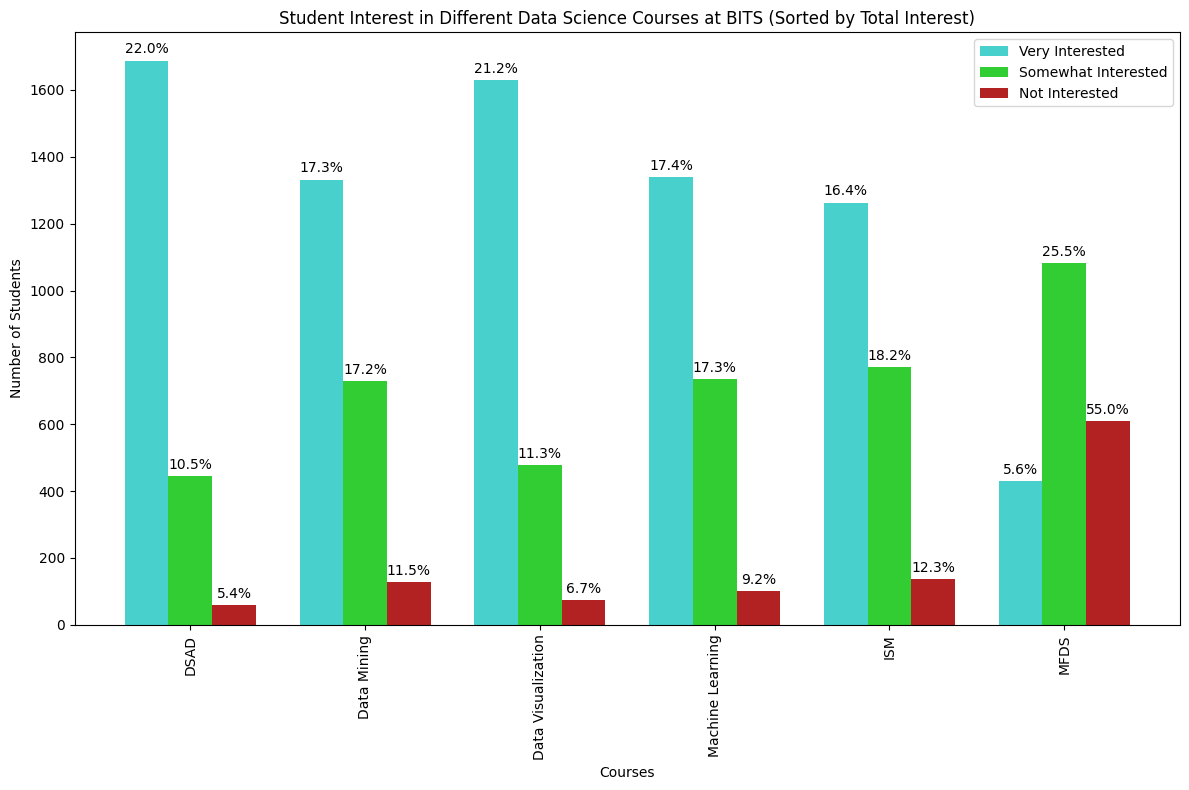

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Prepare the data
data = {
    'Course': ['Data Mining', 'DSAD', 'MFDS', 'Machine Learning', 'ISM', 'Data Visualization'],
    'Very Interested': [1332, 1688, 429, 1340, 1263, 1629],
    'Somewhat Interested': [729, 444, 1081, 734, 770, 477],
    'Not Interested': [127, 60, 610, 102, 136, 74]
}

df = pd.DataFrame(data)

# Step 3: Calculate the total number of students interested for each course
df['Total'] = df[['Very Interested', 'Somewhat Interested', 'Not Interested']].sum(axis=1)

# Sort the DataFrame by the total number of interested students in ascending order
df_sorted = df.sort_values(by='Total', ascending=False)

# Step 4: Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(df_sorted))

bar1 = plt.bar(index, df_sorted['Very Interested'], bar_width, label='Very Interested', color='mediumturquoise')
bar2 = plt.bar([i + bar_width for i in index], df_sorted['Somewhat Interested'], bar_width, label='Somewhat Interested', color='limegreen')
bar3 = plt.bar([i + bar_width * 2 for i in index], df_sorted['Not Interested'], bar_width, label='Not Interested', color='firebrick')

# Step 5: Add labels on top of each bar in percentage
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height/sum(bar.get_height() for bar in bars)*100:.1f}%',  # Calculate percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Step 6: Add title and labels
plt.xlabel('Courses')
plt.ylabel('Number of Students')
plt.title('Student Interest in Different Data Science Courses at BITS (Sorted by Total Interest)')
plt.xticks([i + bar_width for i in index], df_sorted['Course'], rotation=90)  # Rotate labels vertically

# Step 7: Place the legend on the top right
plt.legend(loc='upper right')

# Step 8: Show the plot
plt.tight_layout()
plt.show()


## read it from csv file...make necessary modifications

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Read the data from the CSV file
df = pd.read_csv('survey_on_papers.csv')

# Step 2: Calculate the total number of students interested for each course
df['Total'] = df[['Very Interested', 'Somewhat Interested', 'Not Interested']].sum(axis=1)

# Sort the DataFrame by the total number of interested students in ascending order
df_sorted = df.sort_values(by='Total', ascending=True)

# Step 3: Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(df_sorted))

bar1 = plt.bar(index, df_sorted['Very Interested'], bar_width, label='Very Interested', color='mediumturquoise')
bar2 = plt.bar([i + bar_width for i in index], df_sorted['Somewhat Interested'], bar_width, label='Somewhat Interested', color='limegreen')
bar3 = plt.bar([i + bar_width * 2 for i in index], df_sorted['Not Interested'], bar_width, label='Not Interested', color='firebrick')

# Step 4: Add labels on top of each bar in percentage
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height/sum(bar.get_height() for bar in bars)*100:.1f}%',  # Calculate percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Step 5: Add title and labels
plt.xlabel('Courses')
plt.ylabel('Number of Students')
plt.title('Student Interest in Different Data Science Courses at BITS (Sorted by Total Interest)')
plt.xticks([i + bar_width for i in index], df_sorted['Course'], rotation=90)  # Rotate labels vertically

# Step 6: Place the legend on the top right
plt.legend(loc='upper right')

# Step 7: Show the plot
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'survey_on_papers.csv'

## check column names and add if needed

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define column names
column_names = ['Course', 'Very Interested', 'Somewhat Interested', 'Not Interested']

# Step 1: Read the data from the CSV file and provide column names
df = pd.read_csv('survey_on_papers.csv', names=column_names, header=None)

# Step 2: Calculate the total number of students interested for each course
df['Total'] = df[['Very Interested', 'Somewhat Interested', 'Not Interested']].sum(axis=1)

# Sort the DataFrame by the total number of interested students in ascending order
df_sorted = df.sort_values(by='Total', ascending=True)

# Step 3: Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(df_sorted))

bar1 = plt.bar(index, df_sorted['Very Interested'], bar_width, label='Very Interested', color='mediumturquoise')
bar2 = plt.bar([i + bar_width for i in index], df_sorted['Somewhat Interested'], bar_width, label='Somewhat Interested', color='limegreen')
bar3 = plt.bar([i + bar_width * 2 for i in index], df_sorted['Not Interested'], bar_width, label='Not Interested', color='firebrick')

# Step 4: Add labels on top of each bar in percentage
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height/sum(bar.get_height() for bar in bars)*100:.1f}%',  # Calculate percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Step 5: Add title and labels
plt.xlabel('Courses')
plt.ylabel('Number of Students')
plt.title('Student Interest in Different Data Science Courses at BITS (Sorted by Total Interest)')
plt.xticks([i + bar_width for i in index], df_sorted['Course'], rotation=90)  # Rotate labels vertically

# Step 6: Place the legend on the top right
plt.legend(loc='upper right')

# Step 7: Show the plot
plt.tight_layout()
plt.show()


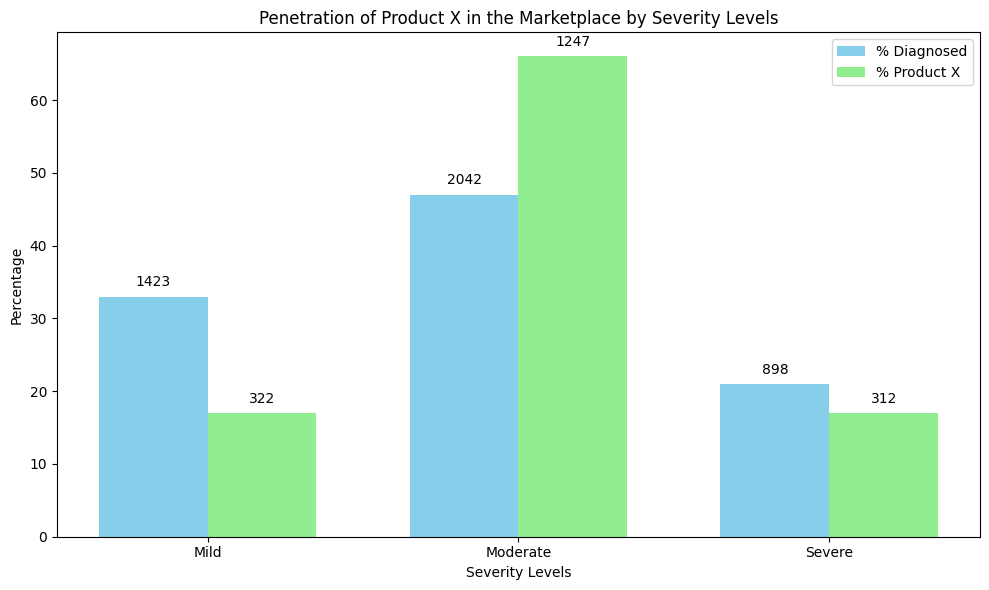

In [5]:
import matplotlib.pyplot as plt

# Data
severity_levels = ['Mild', 'Moderate', 'Severe']
percent_diagnosed = [33, 47, 21]
percent_product_x = [17, 66, 17]

# Number of patients
num_patients_diagnosed = [1423, 2042, 898]
num_patients_product_x = [322, 1247, 312]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(severity_levels))

bar1 = plt.bar(index, percent_diagnosed, bar_width, label='% Diagnosed', color='skyblue')
bar2 = plt.bar([i + bar_width for i in index], percent_product_x, bar_width, label='% Product X', color='lightgreen')

# Add text labels for number of patients
for i in index:
    plt.text(i, percent_diagnosed[i] + 1, str(num_patients_diagnosed[i]), ha='center', va='bottom')
    plt.text(i + bar_width, percent_product_x[i] + 1, str(num_patients_product_x[i]), ha='center', va='bottom')

# Add labels, title, and legend
plt.xlabel('Severity Levels')
plt.ylabel('Percentage')
plt.title('Penetration of Product X in the Marketplace by Severity Levels')
plt.xticks([i + bar_width / 2 for i in index], severity_levels)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


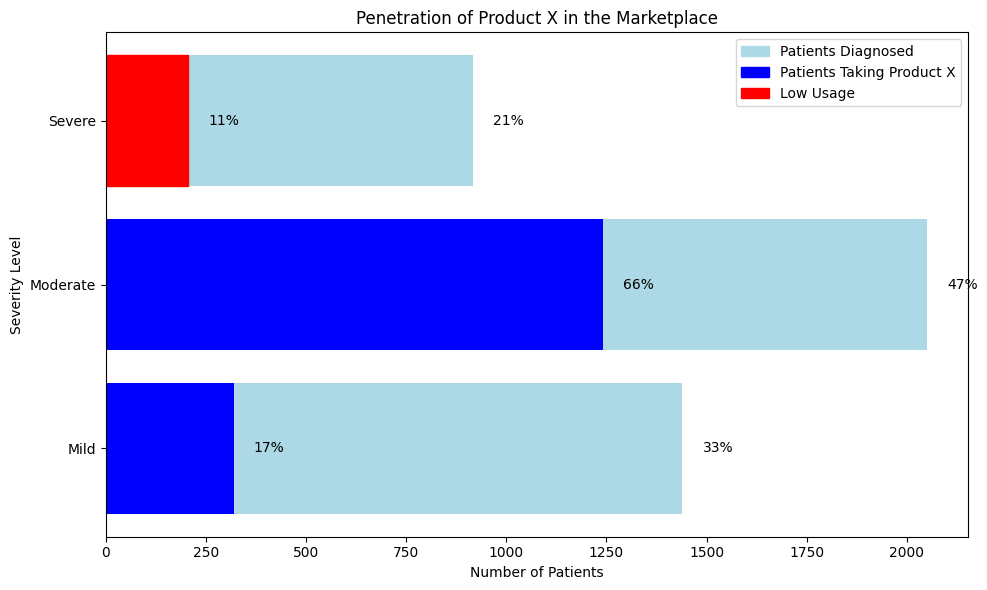

In [24]:
import matplotlib.pyplot as plt

# Data
severity_levels = ['Mild', 'Moderate', 'Severe']
patients_diagnosed_percent = [33, 47, 21]
patients_taking_product_x_percent = [17, 66, 11]

# Total number of patients diagnosed and taking Product X
total_patients_diagnosed = 4363
total_patients_taking_product_x = 1881

# Calculate total patients diagnosed and taking Product X for each severity level
patients_diagnosed = [percent / 100 * total_patients_diagnosed for percent in patients_diagnosed_percent]
patients_taking_product_x = [percent / 100 * total_patients_taking_product_x for percent in patients_taking_product_x_percent]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot patients diagnosed
ax.barh(severity_levels, patients_diagnosed, color='lightblue', label='Patients Diagnosed')

# Plot patients taking Product X on top of patients diagnosed
bars = ax.barh(severity_levels, patients_taking_product_x, color='blue', label='Patients Taking Product X')

# Add text annotation for each bar
for i in range(len(severity_levels)):
    ax.text(patients_diagnosed[i] + 50, i, f'{patients_diagnosed_percent[i]}%', va='center')
    ax.text(patients_taking_product_x[i] + 50, i, f'{patients_taking_product_x_percent[i]}%', va='center')
    
    # Add conditional formatting for bars with lower usage
    if patients_taking_product_x_percent[i] < 15:
        bars[i].set_color('red')  # Change color to red for low usage bars

# Add labels and title
ax.set_xlabel('Number of Patients')
ax.set_ylabel('Severity Level')
ax.set_title('Penetration of Product X in the Marketplace')

# Add legend with specified colors
legend_colors = {'Patients Diagnosed': 'lightblue', 'Patients Taking Product X': 'blue', 'Low Usage': 'red'}
handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors.values()]
ax.legend(handles, legend_colors.keys())

# Show plot
plt.tight_layout()
plt.show()


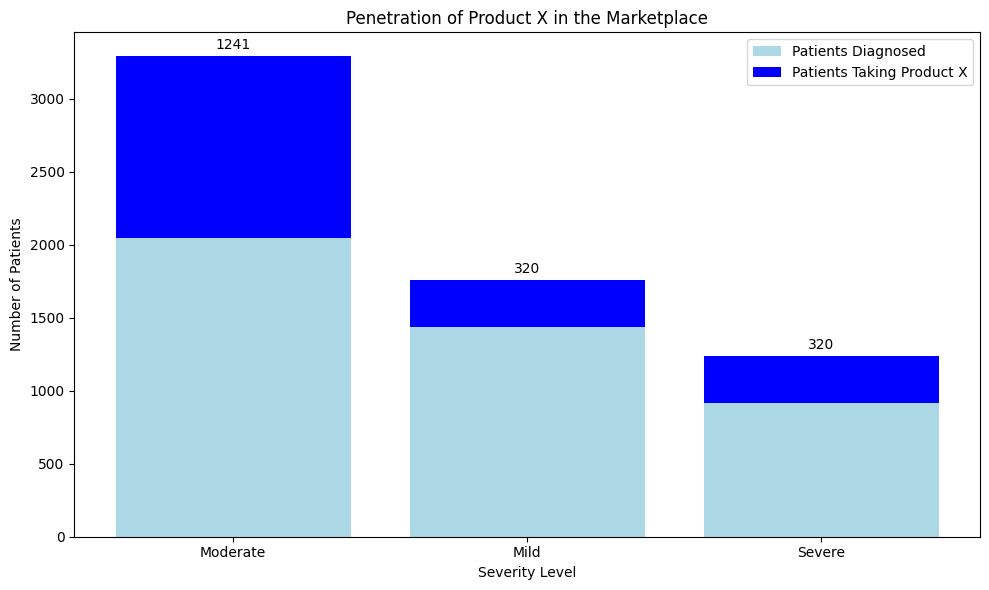

In [26]:
import matplotlib.pyplot as plt

# Data
severity_levels = ['Mild', 'Moderate', 'Severe']
patients_diagnosed_percent = [33, 47, 21]
patients_taking_product_x_percent = [17, 66, 17]

# Total number of patients diagnosed and taking Product X
total_patients_diagnosed = 4363
total_patients_taking_product_x = 1881

# Calculate total patients diagnosed and taking Product X for each severity level
patients_diagnosed = [percent / 100 * total_patients_diagnosed for percent in patients_diagnosed_percent]
patients_taking_product_x = [percent / 100 * total_patients_taking_product_x for percent in patients_taking_product_x_percent]

# Rearrange data to sort by 'Moderate' severity level
severity_levels_sorted = [severity_levels[1], severity_levels[0], severity_levels[2]]
patients_diagnosed_sorted = [patients_diagnosed[1], patients_diagnosed[0], patients_diagnosed[2]]
patients_taking_product_x_sorted = [patients_taking_product_x[1], patients_taking_product_x[0], patients_taking_product_x[2]]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot patients diagnosed
ax.bar(severity_levels_sorted, patients_diagnosed_sorted, color='lightblue', label='Patients Diagnosed')

# Plot patients taking Product X on top of patients diagnosed
ax.bar(severity_levels_sorted, patients_taking_product_x_sorted, bottom=patients_diagnosed_sorted, color='blue', label='Patients Taking Product X')

# Add text annotation for each bar
for i in range(len(severity_levels_sorted)):
    ax.text(severity_levels_sorted[i], patients_diagnosed_sorted[i] + patients_taking_product_x_sorted[i] + 50, f'{patients_taking_product_x_sorted[i]:.0f}', ha='center')

# Add insight for low usage
for i in range(len(severity_levels_sorted)):
    if patients_taking_product_x_sorted[i] < 200:
        ax.text(severity_levels_sorted[i], 50, 'Low Usage', ha='center', color='red')

# Add labels and title
ax.set_xlabel('Severity Level')
ax.set_ylabel('Number of Patients')
ax.set_title('Penetration of Product X in the Marketplace')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In the provided visualization, insights can be drawn regarding the penetration of Product X in the marketplace across different severity levels of Alice in Wonderland syndrome. Here are some potential insights:

Product Adoption: The visualization illustrates the adoption of Product X across different severity levels. It shows the number of patients diagnosed with each severity level and the subset of those patients who are taking Product X. This provides insight into how widely the product is being used among patients with varying degrees of the syndrome.

Moderate Severity Dominance: Notably, the moderate severity level accounts for the highest number of patients diagnosed as well as the highest number of patients taking Product X. This suggests that Product X might be more effective or suitable for patients with moderate symptoms compared to mild or severe cases.

Low Usage Alert: The annotation highlights instances where the usage of Product X is particularly low. For example, in the 'Mild' category, there's a note indicating 'Low Usage' where the number of patients taking Product X is less than 200. This draws attention to areas where efforts to promote or increase the adoption of the product may be needed.

Market Potential: By comparing the total number of patients diagnosed across severity levels with the subset of those taking Product X, the visualization hints at the market potential for Product X. It suggests areas where there may be opportunities for growth in product adoption, such as increasing usage among patients diagnosed with mild symptoms.

Overall, the visualization provides valuable insights for the pharmaceutical company to understand the distribution of Product X usage across different severity levels of Alice in Wonderland syndrome and to identify potential areas for targeted interventions or marketing strategies.

Gestalt principles are fundamental concepts in visual perception that can be applied to enhance the effectiveness of visualizations. Here's how we can incorporate some of these principles into the provided visualization:

Proximity: Elements that are close to each other are perceived as belonging together. In the bar chart, the bars representing the number of patients diagnosed and those taking Product X are placed close to each other for each severity level. This proximity reinforces the relationship between the two sets of data.

Similarity: Similar elements are perceived as related or belonging together. The use of consistent colors (light blue for patients diagnosed, blue for patients taking Product X) and the uniformity in bar width and style across severity levels create a sense of similarity and cohesion within the visualization.

Continuity: Elements arranged on a line or curve are perceived as more related than elements not on the line or curve. The horizontal arrangement of severity levels along the x-axis creates a sense of continuity, making it easier for viewers to compare data across different categories.

Closure: When partial information is present, our brain tends to perceive the missing parts as a whole. While not explicitly shown, viewers can infer the total number of patients diagnosed and taking Product X for each severity level by mentally combining the two bar segments. This principle helps viewers quickly grasp the overall distribution of Product X usage.

By leveraging these Gestalt principles, the visualization enhances the clarity and comprehension of the data, making it easier for stakeholders to interpret and derive insights from the chart.

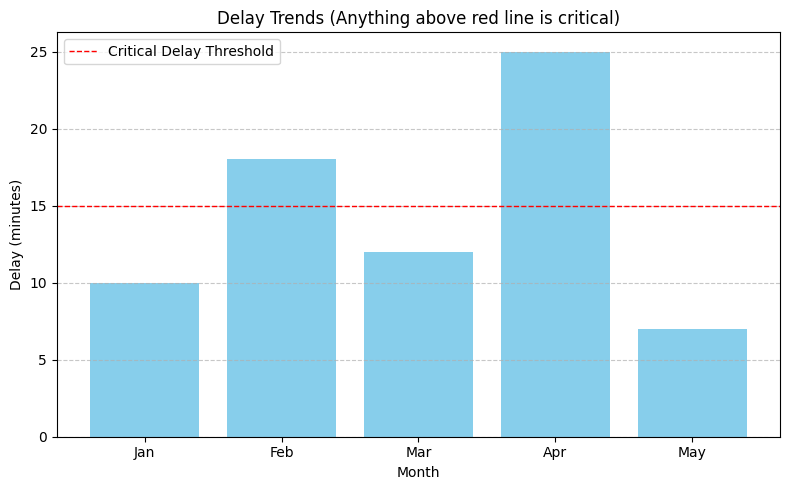

In [27]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
delays = [10, 18, 12, 25, 7]
months = ["Jan", "Feb", "Mar", "Apr", "May"]

# Set critical delay threshold
critical_delay = 15

# Create the graph
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

# Plot the bars
plt.bar(months, delays, color='skyblue')

# Add reference line for critical delay
plt.axhline(y=critical_delay, color='red', linestyle='--', linewidth=1, label='Critical Delay Threshold')

# Label the axes
plt.xlabel('Month')
plt.ylabel('Delay (minutes)')

# Set x-axis tick labels
plt.xticks(months)

# Add title (optional)
plt.title('Delay Trends (Anything above red line is critical)')

# Show legend
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


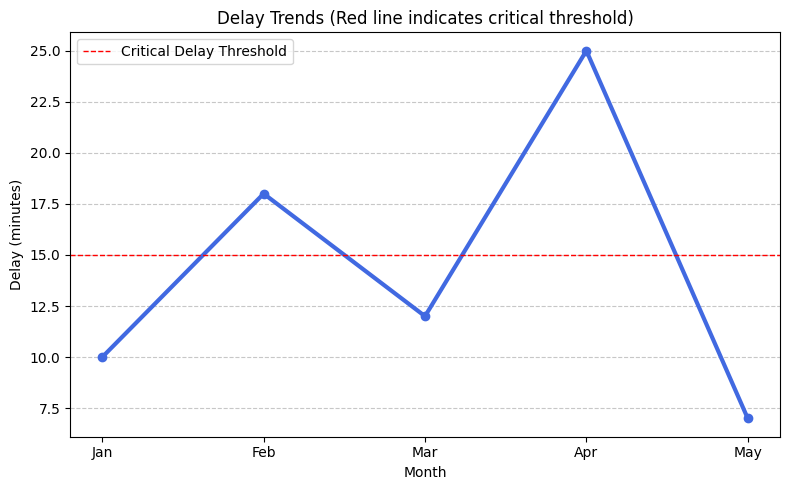

In [30]:
import matplotlib.pyplot as plt

# Sample data
delays = [10, 18, 12, 25, 7]
months = ["Jan", "Feb", "Mar", "Apr", "May"]

# Critical delay threshold
critical_delay = 15

# Create the graph
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

# Plot the line with markers
line1, = plt.plot(months, delays, marker='o', color='royalblue', linewidth=2)  # unpack line object

# Add reference line for critical delay
plt.axhline(y=critical_delay, color='red', linestyle='--', linewidth=1, label='Critical Delay Threshold')

# Label the axes
plt.xlabel('Month')
plt.ylabel('Delay (minutes)')

# Set x-axis tick labels
plt.xticks(months)

# Thicken the critical delay line for emphasis (optional)
line1.set_linewidth(3)  # target the line object

# Add title (optional)
plt.title('Delay Trends (Red line indicates critical threshold)')

# Show legend
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Here's what improves clarity in this line graph:

Markers: Using markers on the data points enhances readability, especially when there are few data points.
Thicker critical delay line (optional): This emphasizes the threshold visually.
Title (optional): A clear title can improve overall understanding.
This line graph provides a clear view of delay trends across months while highlighting the critical delay threshold. You can experiment with different marker styles, line colors, and grid options to further customize the visualization for optimal clarity.

In [31]:
import pandas as pd

# Assuming you have the data in a CSV file named 'books.csv'
data = pd.read_csv('books.csv')

# Print the first 5 rows of the DataFrame
print(data.head())

# Get basic information about the DataFrame
print(data.info())

# Get summary statistics for numerical columns (average rating, # num_pages, ratings_count, text_reviews_count)
print(data.describe())

# How many unique books are there?
num_unique_books = data['bookID'].nunique()
print(f"There are {num_unique_books} unique books in the DataFrame.")

# Find the book with the highest average rating
highest_rated_book = data.loc[data['average_rating'].idxmax()]
print(f"The book with the highest average rating is: {highest_rated_book['title']} by {highest_rated_book['authors']}")

# Filter books with a specific language code (e.g., 'en' for English)
english_books = data[data['language_code'] == 'en']
print(f"There are {len(english_books)} books in English.")

# You can perform many other operations on the DataFrame based on your specific needs.


FileNotFoundError: [Errno 2] No such file or directory: 'books.csv'

This code snippet demonstrates some basic functionalities you can perform on your DataFrame:

Import pandas library.
Read the CSV file 'books.csv' into a DataFrame named data.
Print the first 5 rows using head().
Get information about the DataFrame structure using info().
Get descriptive statistics for numerical columns using describe().
Count the number of unique books using nunique() on the bookID column.
Find the book with the highest average rating using idxmax() and appropriate indexing.
Filter books with a specific language code using boolean indexing.

In [32]:
import pandas as pd

# Assuming you have loaded the DataFrame from a CSV file
# Replace 'data.csv' with the actual file path
df = pd.read_csv('data.csv')

# Display the data types and structure of the DataFrame
print(df.dtypes)
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

#:                    int64
bookID:               int64
title:               object
authors:             object
average_rating:     float64
isbn:                object
isbn13:               int64
language_code:       object
# num_pages:          int64
ratings_count:        int64
text_reviews_count:   int64
dtype: object

     #  bookID:                                              title:  \
0    1  2767052                            The Hunger Games (The Hunger Games, #1)   
1    2        3              Harry Potter and the Sorcerer's Stone (Harry Potter, #1)   
2    3    41865                            Twilight (Twilight, #1)   
3    4     2657  To Kill a Mockingbird (To Kill a Mockingbird, #1)   
4    5     4671                                   The Great Gatsby   
   
                authors:  average_rating        isbn        isbn13 language_code  \
0      Suzanne Collins             4.34  0439023483  9.780439e+12           eng   
1         J.K. Rowling             4.44  0439554934  9.780440e+12           eng   
2  Stephenie Meyer, Megan Tingley 3.57  0316015849  9.780316e+12           eng   
3           Harper Lee             4.25  0061120081  9.780061e+12           eng   
4  F. Scott Fitzgerald             3.89  0743273567  9.780743e+12           eng   

   # num_pages  ratings_count  text_reviews_count  
0          374        4780653              155254  
1          320        4602479               75867  
2          498        3866839               95009  
3          324        3198671               72586  
4          180        2683664               51992  


In [35]:
# Sort the DataFrame by 'ratings_count' column in descending order and select the top 10 rows
top_10_most_rated_books = df.sort_values(by='ratings_count', ascending=False).head(10)

# Display the top 10 most rated books
print(top_10_most_rated_books[['title:', 'authors:', 'ratings_count']])


KeyError: 'ratings_count'

## recreate the visuals with code

In [36]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
# Assuming you have a DataFrame 'data' containing book titles and average ratings
titles = data['title'].tolist()[:10]  # Get top 10 titles
ratings = data['average_rating'].tolist()[:10]  # Get top 10 ratings

# Sort together by rating (descending)
sorted_data = sorted(zip(titles, ratings), key=lambda x: x[1], reverse=True)
titles, ratings = zip(*sorted_data)

# Set a limit for the y-axis (optional, adjust as needed)
rating_limit = 5

# Create the graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the bars
plt.barh(titles, ratings, color='skyblue')

# Add reference line for average rating (optional)
plt.axvline(x=data['average_rating'].mean(), color='green', linestyle='--', linewidth=1, label='Average Rating')

# Label the axes
plt.xlabel('Average Rating')
plt.ylabel('Book Title')

# Set y-axis limits (optional)
plt.ylim(-1, rating_limit)  # Adjust top limit as needed

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Show legend (optional)
# plt.legend()

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: 'title'

Explanation and Considerations:

Import libraries: This code imports matplotlib.pyplot for creating the visualization.
Sample data: Replace the sample data with code to extract titles and ratings from the top 10 rows of your DataFrame (data). Ensure the DataFrame is sorted by rating (descending) to get the top-rated books first.
Sort data: Sorts the titles and ratings together based on ratings in descending order using sorted() and zip().
Rating limit (optional): Sets an optional limit for the y-axis (rating) to control the scale. Adjust rating_limit as needed.
Create the graph: Creates a figure and a bar plot using plt.barh() for horizontal bars.
Reference line (optional): Adds a reference line for the average rating using plt.axvline(). The average rating is calculated using data['average_rating'].mean().
Label axes: Labels the x-axis as 'Average Rating' and the y-axis as 'Book Title'.
Axis limits (optional): Sets optional limits for the y-axis to focus on the upper range of ratings. Adjust rating_limit as needed.
Rotate labels (optional): Rotates the x-axis labels for better readability using plt.xticks(rotation=45).
Legend (optional): Includes a legend to explain the reference line but is commented out as it might clutter the plot with few elements. Uncomment plt.legend() if you prefer to show the legend.
Grid and title (optional): You can add a grid with plt.grid() and a title with plt.title() for further customization.
This code addresses the feedback by:

Using a horizontal bar chart for readability of book titles.
Incorporating a reference line to visually represent the average rating.
Sorting and limiting the data to focus on the top 10 most rated books.
Adjusting axis limits and label rotations for clarity.
Remember to replace the sample data with your DataFrame and customize the plot according to your preferences.

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your extracted data)
authors = ["Agatha Christie", "Stephen King", "Orson Scott Card", "Rumiko Takahashi", 
            "P.G. Wodehouse", "Terry Brooks", "Piers Anthony", "Margaret Weis-Tracy Hickman",  
            "Dan Simmons", "Sandra Brown"]

title_counts = [60, 50, 40, 30, 20, 10, 10, 10, 10, 10] 

# Create the graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the bars
plt.bar(authors, title_counts, color='goldenrod')

# Label the axes
plt.xlabel('Authors')
plt.ylabel('Title Count')

# Set x-axis rotation for readability (optional)
plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Explanation:

Import libraries: Import matplotlib.pyplot for creating the visualization.
Sample data: Replace the sample data with your extracted list of authors and title counts.
Create the graph: Create a figure and a bar chart using plt.bar() for vertical bars.
Label axes: Label the x-axis as 'Authors' and the y-axis as 'Title Count'.
Rotate x-axis labels (optional): Rotate the x-axis labels for readability using plt.xticks(rotation=45) and ha='right' for right-alignment.
Grid: Add a grid with plt.grid().
Show the plot: Display the plot using plt.show().
Customizations:

Experiment with different colors, bar widths, and font sizes using Matplotlib options.
You can add a title using plt.title('Top 10 Authors by Book Count').
Consider adding a reference line to indicate the average number of books per author (optional).
This approach allows you to create a clear bar chart visualizing the top 10 authors and their book counts. If the data is readily available online, you can explore web scraping for data extraction, but keep in mind potential complexities and ethical considerations.